In [7]:
from scripts.StreamProcessing import Stream_Data, ClimateChangeDataset # found in the scripts folder inside StreamProcessing.py. This class uses PySpark

https://berkeleyearth.org/data/

### A note on block 

These might take a while as PySpark attempts to download some additional files

In [8]:
# Initialize the Stream_Data Class using the topic name/s established in the kafka-config/kafka-config.ipynb and add the host of your kafka instance in the host parameter
emissions_config = Stream_Data(topics='ghg_data', host='localhost:9092')
e_session, query, emissions_df = emissions_config.getData()
#temperatures

/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/mysql-connector-j-8.0.33.jar
/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/graphframes-0.8.2-spark3.2-s_2.12.jar


-------------------------------------------
Batch: 0
-------------------------------------------
+-----------+---------+----+-----+
|    Country|Pollutant|Year|Value|
+-----------+---------+----+-----+
|Afghanistan|      GHG|1990| 9.58|
|Afghanistan|      GHG|1991| 9.81|
|Afghanistan|      GHG|1992| 9.03|
|Afghanistan|      GHG|1993| 9.11|
|Afghanistan|      GHG|1994| 9.15|
|Afghanistan|      GHG|1995| 9.58|
|Afghanistan|      GHG|1996|10.61|
|Afghanistan|      GHG|1997|11.58|
|Afghanistan|      GHG|1998| 12.4|
|Afghanistan|      GHG|1999|13.28|
|Afghanistan|      GHG|2000| 11.5|
|Afghanistan|      GHG|2001|12.37|
|Afghanistan|      GHG|2002|15.01|
|Afghanistan|      GHG|2003|15.65|
|Afghanistan|      GHG|2004|15.44|
|Afghanistan|      GHG|2005|16.35|
|Afghanistan|      GHG|2006|16.87|
|Afghanistan|      GHG|2007|17.26|
|Afghanistan|      GHG|2008|20.66|
|Afghanistan|      GHG|2009|22.75|
+-----------+---------+----+-----+
only showing top 20 rows



In [ ]:
# Initialize the Stream_Data Class using the topic name/s established in the kafka-config/kafka-config.ipynb and add the host of your kafka instance in the host parameter
C02_config = Stream_Data(topics='C02', host='localhost:9092')
c02_session, query_c02, C02_df = C02_config.getData()

/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/mysql-connector-j-8.0.33.jar
/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/graphframes-0.8.2-spark3.2-s_2.12.jar


-------------------------------------------
Batch: 0
-------------------------------------------
+-----------+----+----+------------+
|     Entity|Code|Year|       Value|
+-----------+----+----+------------+
|Afghanistan| AFG|1949|0.0019223358|
|Afghanistan| AFG|1950| 0.011265611|
|Afghanistan| AFG|1951| 0.012097932|
|Afghanistan| AFG|1952| 0.011946474|
|Afghanistan| AFG|1953| 0.013684762|
|Afghanistan| AFG|1954| 0.013511202|
|Afghanistan| AFG|1955| 0.019303724|
|Afghanistan| AFG|1956| 0.022651596|
|Afghanistan| AFG|1957|   0.0357019|
|Afghanistan| AFG|1958| 0.039568856|
|Afghanistan| AFG|1959|  0.04541344|
|Afghanistan| AFG|1960|  0.04800073|
|Afghanistan| AFG|1961|  0.05583506|
|Afghanistan| AFG|1962|  0.07677442|
|Afghanistan| AFG|1963|  0.07717596|
|Afghanistan| AFG|1964|  0.08963178|
|Afghanistan| AFG|1965|  0.10526929|
|Afghanistan| AFG|1966|  0.11153449|
|Afghanistan| AFG|1967|  0.12805797|
|Afghanistan| AFG|1968| 0.119381055|
+-----------+----+----+------------+
only showing to

In [10]:
# Initialize the Stream_Data Class using the topic name/s established in the kafka-config/kafka-config.ipynb and add the host of your kafka instance in the host parameter
temperature_config = Stream_Data(topics='temperature', host='localhost:9092')
t_session, query_temperature, temperature_df = temperature_config.getData()

/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/mysql-connector-j-8.0.33.jar
/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/graphframes-0.8.2-spark3.2-s_2.12.jar


-------------------------------------------
Batch: 0
-------------------------------------------
+--------+--------------------+------------------+-----------+---------+--------+
|REF_AREA|             Measure|      UNIT_MEASURE|TIME_PERIOD|OBS_VALUE|REF_CODE|
+--------+--------------------+------------------+-----------+---------+--------+
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1979|    -0.55|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1980|    -0.17|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1981|    -0.48|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1982|    -0.53|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1983|    -0.89|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1984|    -0.82|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1985|    -0.43|     YEM|
|   Yemen|TEMP_C: Annual te...|C: Degrees celsius|       1986|    -0.53|     YEM|
|

### NOTE
Everything is configered while initializing the PySpark Session in the ```StreamProcessing.py``` class. DO NOT remove the ```from graphframes import GraphFrame```, as the jar files are loaded while getting the data from the previous code block

In [14]:
from graphframes import GraphFrame
import findspark as tt
tt.init(emissions_config.getSpark_Path()) 
from pyspark.sql import functions as F
from pyspark.sql.functions import dense_rank, lit
from pyspark.sql.window import Window

In [12]:
print(temperature_df)
print(emissions_df)
print(C02_df)

DataFrame[REF_AREA: string, Measure: string, UNIT_MEASURE: string, TIME_PERIOD: int, OBS_VALUE: double, REF_CODE: string]
DataFrame[Country: string, Pollutant: string, Year: int, Value: double]
DataFrame[Entity: string, Code: string, Year: int, Value: double]


In [18]:
temp_df = temperature_df.withColumnRenamed('REF_CODE','COUNTRY_CODE')
ghg_df = emissions_df.withColumnRenamed('Pollutant','POL')
C02_temp_df = C02_df.withColumnRenamed('Entity','Country')
C02_temp_df = C02_temp_df.withColumn('POL', lit('C02'))

myDataset = temp_df.join(ghg_df, (temp_df.REF_AREA == ghg_df.Country) & (temp_df.TIME_PERIOD == ghg_df.Year), 'inner')


myDataset = myDataset.select(temp_df.COUNTRY_CODE, ghg_df.Country,ghg_df.Year, temp_df.UNIT_MEASURE, temp_df.OBS_VALUE, ghg_df.POL, ghg_df.Value)

C02ML = temp_df.join(C02_temp_df, (temp_df.COUNTRY_CODE == C02_temp_df.Code) & (temp_df.TIME_PERIOD == C02_temp_df.Year), 'inner')

C02ML = C02ML.select(temp_df.COUNTRY_CODE, C02_temp_df.Country, C02_temp_df.Year, temp_df.UNIT_MEASURE, temp_df.OBS_VALUE, C02_temp_df.POL, C02_temp_df.Value)

# ran into out of memory exception

# We'll be assigning the country_codes as ids to map relationships

Store the Dataset before we attempt to use models

In [19]:
config_train = Stream_Data(topics=None, host='localhost:9092')
config_train.storeData('climate_change', myDataset) # we are about to store the new dataset in a mySQL table

In [20]:
C02_Config_train = Stream_Data(topics=None, host='localhost:9092')
C02_Config_train.storeData('C02ML', C02ML)

# Machine Learning Section.

In [21]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# For Greenhouse Gases

In the following code block we are setting up the Linear Regression to set up a model to predict the temperatures based on the given Green house Gases levels

In [22]:
assembler = VectorAssembler(inputCols=['Partition', 'Year', 'Value'], outputCol='features')
#scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
linear_regression = LinearRegression(labelCol='OBS_VALUE', featuresCol='features')
linear_regression.setMaxIter(50)
'''
    Stages

    1) Get the features of the model,
    2) apply training using linear regression. This uses the OBS_VALUE (which is the temperature value) as Y
'''
pipeline = Pipeline(stages=[assembler, linear_regression])

In [23]:
climate_change_df = ClimateChangeDataset().loadDataset()
climate_change_df.show()

/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/graphframes-0.8.2-spark3.2-s_2.12.jar
+------------+------------------+----+------------------+---------+---+-------+
|COUNTRY_CODE|           Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|  Value|
+------------+------------------+----+------------------+---------+---+-------+
|         BRB|          Barbados|1998|C: Degrees celsius|     0.56|GHG|   3.59|
|         BWA|          Botswana|2014|C: Degrees celsius|    -0.44|GHG|  54.09|
|         CMR|          Cameroon|1996|C: Degrees celsius|    -0.08|GHG| 133.83|
|         CAN|            Canada|2009|C: Degrees celsius|     0.15|GHG| 954.58|
|         CAN|            Canada|2019|C: Degrees celsius|     0.68|GHG| 774.29|
|         COL|          Colombia|2006|C: Degrees celsius|     0.23|GHG| 227.02|
|         COM|           Comoros|2003|C: Degrees celsius|     0.24|GHG|   0.41|
|         HRV|           Croatia|2014|C: Degrees

In [24]:
climate_change_df = climate_change_df.withColumn('Partition', dense_rank().over(Window.partitionBy('COUNTRY_CODE').orderBy('Year')))
climate_change_df.show()

+------------+-----------+----+------------------+---------+---+-----+---------+
|COUNTRY_CODE|    Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|Value|Partition|
+------------+-----------+----+------------------+---------+---+-----+---------+
|         AFG|Afghanistan|1990|C: Degrees celsius|     0.05|GHG| 9.58|        1|
|         AFG|Afghanistan|1991|C: Degrees celsius|    -0.96|GHG| 9.81|        2|
|         AFG|Afghanistan|1992|C: Degrees celsius|    -1.19|GHG| 9.03|        3|
|         AFG|Afghanistan|1993|C: Degrees celsius|    -0.67|GHG| 9.11|        4|
|         AFG|Afghanistan|1994|C: Degrees celsius|    -0.34|GHG| 9.15|        5|
|         AFG|Afghanistan|1995|C: Degrees celsius|    -0.46|GHG| 9.58|        6|
|         AFG|Afghanistan|1996|C: Degrees celsius|    -0.68|GHG|10.61|        7|
|         AFG|Afghanistan|1997|C: Degrees celsius|    -0.57|GHG|11.58|        8|
|         AFG|Afghanistan|1998|C: Degrees celsius|     0.47|GHG| 12.4|        9|
|         AFG|Afghanistan|19

In [25]:
train, test = climate_change_df.randomSplit([0.8, 0.2], seed=42)

## Correlation between Year and Temperature (Total emissions excluding LULUCF)

In [26]:
climate_change_df.stat.corr('Year', 'OBS_VALUE')

0.5408678020383442

## Correlation between Year and Emissions Value ('Total emissions excluding LULUCF')

In [27]:
climate_change_df.stat.corr('Year', 'Value')

0.02287905746167048

## Correlation between Temperature and Emissions Value (Total emissions excluding LULUCF)

In [28]:
climate_change_df.stat.corr('Value', 'OBS_VALUE')

0.03520722512137209

### Dataset Analysis

In [29]:
train.show()

+------------+-----------+----+------------------+---------+---+-----+---------+
|COUNTRY_CODE|    Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|Value|Partition|
+------------+-----------+----+------------------+---------+---+-----+---------+
|         AFG|Afghanistan|1990|C: Degrees celsius|     0.05|GHG| 9.58|        1|
|         AFG|Afghanistan|1991|C: Degrees celsius|    -0.96|GHG| 9.81|        2|
|         AFG|Afghanistan|1993|C: Degrees celsius|    -0.67|GHG| 9.11|        4|
|         AFG|Afghanistan|1994|C: Degrees celsius|    -0.34|GHG| 9.15|        5|
|         AFG|Afghanistan|1995|C: Degrees celsius|    -0.46|GHG| 9.58|        6|
|         AFG|Afghanistan|1997|C: Degrees celsius|    -0.57|GHG|11.58|        8|
|         AFG|Afghanistan|1999|C: Degrees celsius|     0.38|GHG|13.28|       10|
|         AFG|Afghanistan|2000|C: Degrees celsius|      0.4|GHG| 11.5|       11|
|         AFG|Afghanistan|2001|C: Degrees celsius|     1.23|GHG|12.37|       12|
|         AFG|Afghanistan|20

In [30]:
val, test = test.randomSplit([.5, .5], seed=42)

In [31]:
val.show()

+------------+-----------+----+------------------+---------+---+------+---------+
|COUNTRY_CODE|    Country|Year|      UNIT_MEASURE|OBS_VALUE|POL| Value|Partition|
+------------+-----------+----+------------------+---------+---+------+---------+
|         AFG|Afghanistan|2003|C: Degrees celsius|      0.3|GHG| 15.65|       14|
|         AGO|     Angola|1995|C: Degrees celsius|     0.31|GHG| 76.32|        6|
|         AGO|     Angola|2007|C: Degrees celsius|     0.12|GHG| 117.2|       18|
|         AGO|     Angola|2011|C: Degrees celsius|    -0.12|GHG|126.65|       22|
|         ALB|    Albania|2007|C: Degrees celsius|     0.62|GHG|  7.75|       18|
|         AND|    Andorra|2012|C: Degrees celsius|      0.4|GHG|   0.6|       23|
|         AND|    Andorra|2017|C: Degrees celsius|     0.99|GHG|  0.59|       28|
|         ARG|  Argentina|2000|C: Degrees celsius|    -0.67|GHG|337.38|       11|
|         ARG|  Argentina|2004|C: Degrees celsius|     0.34|GHG|414.15|       15|
|         ARG|  

In [32]:
test.show()

+------------+--------------------+----+------------------+---------+---+------+---------+
|COUNTRY_CODE|             Country|Year|      UNIT_MEASURE|OBS_VALUE|POL| Value|Partition|
+------------+--------------------+----+------------------+---------+---+------+---------+
|         AFG|         Afghanistan|1992|C: Degrees celsius|    -1.19|GHG|  9.03|        3|
|         AFG|         Afghanistan|1996|C: Degrees celsius|    -0.68|GHG| 10.61|        7|
|         AFG|         Afghanistan|1998|C: Degrees celsius|     0.47|GHG|  12.4|        9|
|         AFG|         Afghanistan|2009|C: Degrees celsius|     0.16|GHG| 22.75|       20|
|         AFG|         Afghanistan|2013|C: Degrees celsius|     0.66|GHG| 26.77|       24|
|         AFG|         Afghanistan|2019|C: Degrees celsius|     0.78|GHG| 28.79|       30|
|         AGO|              Angola|2005|C: Degrees celsius|     0.47|GHG|114.87|       16|
|         AGO|              Angola|2006|C: Degrees celsius|    -0.27|GHG|112.77|       17|

In [33]:
dataset_count = (train.count(), val.count(), test.count())

In [34]:
import matplotlib.pyplot as plt

The plot shows how the dataset is split before being passed to the model.

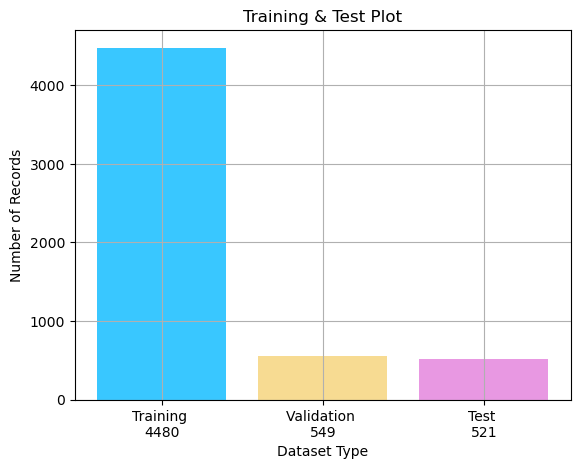

In [35]:
x_axis = ['Training \n{0}'.format(dataset_count[0]), 'Validation \n{0}'.format(dataset_count[1]), 'Test \n{0}'.format(dataset_count[2])]
y_axis = list(dataset_count)
plt.bar(x_axis, y_axis, color=['#39C7FF', '#F7DB92', '#E898E2'])
plt.title('Training & Test Plot')
plt.xlabel('Dataset Type')
plt.ylabel('Number of Records')
plt.grid()
plt.show()

In [36]:
pipeline_model = pipeline.fit(train) # training the Linear Regression
val_predictions = pipeline_model.transform(val)
#test_predictions = pipeline_model.transform(test)

In [37]:
test = test.na.drop() 
test_predictions = pipeline_model.transform(test)

For Validation

In [38]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='rmse'
)

rmse = evaluator.evaluate(val_predictions)
print('RMSE: {0}'.format(rmse))

RMSE: 0.43305559517245895


In [39]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='r2'
)
r2 = evaluator.evaluate(val_predictions)
print('R-squared:', r2)

R-squared: 0.257867474347119


For Test

In [40]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='rmse'
)

rmse = evaluator.evaluate(test_predictions)
print('RMSE: {0}'.format(rmse))

RMSE: 0.42410941789432993


In [41]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='r2'
)
r2 = evaluator.evaluate(test_predictions)
print('R-squared:', r2)

R-squared: 0.3218031940115833


In [42]:
lr_model = pipeline_model.stages[-1]
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [0.031513399006997095,0.000797336659250646,2.521981993093973e-05]
Intercept: -1.8233873714499649


In [43]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

val2, train2 = val, train
train2, val2 = assembler.transform(train2), assembler.transform(val2)
train_pd = train2.select('features', 'OBS_VALUE').toPandas()
val_pd = val2.select('features', 'OBS_VALUE').toPandas()

# tried with this: max_iter=20000, epsilon=0.01
svr = SVR()
svr.fit(train_pd['features'].tolist(), train_pd['OBS_VALUE'])

predictions = svr.predict(val_pd['features'].tolist())

y_true = val_pd['OBS_VALUE'].tolist()

# Calculate the RMSE
mse = mean_squared_error(y_true, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, predictions)
print("R-squared:", r2)

RMSE: 0.4562016517424311
R-squared: 0.17641606917973263


In [44]:
test2 = test
test2 = test2.na.drop() 
test2 = assembler.transform(test2)

test_pd = test2.select('features', 'OBS_VALUE').toPandas()
predictions = svr.predict(test_pd['features'].tolist())

y_true = test_pd['OBS_VALUE'].tolist()

# Calculate the RMSE
mse = mean_squared_error(y_true, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, predictions)
print("R-squared:", r2)

RMSE: 0.4561342181996718
R-squared: 0.21551397129708016


# For C02

In [61]:
assembler = VectorAssembler(inputCols=['Partition', 'Year', 'VALUE'], outputCol='features')
#scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
linear_regression = LinearRegression(labelCol='OBS_VALUE', featuresCol='features')
linear_regression.setMaxIter(50)
'''
    Stages

    1) Get the features of the model,
    2) apply training using linear regression. This uses the OBS_VALUE (which is the temperature value) as Y
'''
pipeline = Pipeline(stages=[assembler, linear_regression])

In [45]:
C02_change_df = ClimateChangeDataset(table='C02ML').loadDataset()
C02_change_df.show()

/media/camagakhan/DATA/Repositories/BigDataProcessing/Assignment/BigDataProcessingClimateChange/notebooks/scripts/graphframes-0.8.2-spark3.2-s_2.12.jar
+------------+-------------+----+------------------+---------+---+----------+
|COUNTRY_CODE|      Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|     VALUE|
+------------+-------------+----+------------------+---------+---+----------+
|         AFG|  Afghanistan|1988|C: Degrees celsius|     0.73|C02|0.27513915|
|         AZE|   Azerbaijan|1999|C: Degrees celsius|     0.67|C02| 3.5265093|
|         CMR|     Cameroon|2009|C: Degrees celsius|     0.55|C02|0.34131974|
|         CAN|       Canada|2020|C: Degrees celsius|      0.5|C02|  14.11671|
|         COG|        Congo|2016|C: Degrees celsius|     0.98|C02| 1.1201208|
|         CRI|   Costa Rica|2000|C: Degrees celsius|    -0.49|C02| 1.3555207|
|         CIV|Cote d'Ivoire|1988|C: Degrees celsius|     0.02|C02| 0.7972863|
|         CYP|       Cyprus|1984|C: Degrees celsius|    -0.63|C02| 4

In [46]:
C02_change_df = C02_change_df.withColumn('Partition', dense_rank().over(Window.partitionBy('COUNTRY_CODE').orderBy('Year')))
C02_change_df.show()

+------------+-------+----+------------------+---------+---+---------+---------+
|COUNTRY_CODE|Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|    VALUE|Partition|
+------------+-------+----+------------------+---------+---+---------+---------+
|         ABW|  Aruba|1979|C: Degrees celsius|     0.04|C02|  9.17164|        1|
|         ABW|  Aruba|1980|C: Degrees celsius|     0.16|C02| 9.398992|        2|
|         ABW|  Aruba|1981|C: Degrees celsius|     0.18|C02| 8.902912|        3|
|         ABW|  Aruba|1982|C: Degrees celsius|     -0.3|C02| 9.875782|        4|
|         ABW|  Aruba|1983|C: Degrees celsius|     0.07|C02|5.0308514|        5|
|         ABW|  Aruba|1984|C: Degrees celsius|    -0.45|C02|12.465213|        6|
|         ABW|  Aruba|1985|C: Degrees celsius|    -0.48|C02|14.521452|        7|
|         ABW|  Aruba|1986|C: Degrees celsius|    -0.39|C02|2.7804863|        8|
|         ABW|  Aruba|1987|C: Degrees celsius|     0.35|C02|6.9343343|        9|
|         ABW|  Aruba|1988|C

In [47]:
train, test = C02_change_df.randomSplit([0.8, 0.2], seed=42)

## Correlation between Year and Temperature (C02)

In [48]:
C02_change_df.stat.corr('Year', 'OBS_VALUE')

0.6342376498288776

## Correlation between Year and Emissions Value (C02)

In [60]:
C02_change_df.stat.corr('Year', 'VALUE')

0.002194727451085219

## Correlation between Temperature and Emissions Value (C02)

In [59]:
C02_change_df.stat.corr('VALUE', 'OBS_VALUE')

0.004596443748761662

Dataset disproves what this paper said; that temperature rise has a direct relationship with C02. Reason being is that most countries are gradually removing GHGs from their portfolio https://link.springer.com/article/10.1007/s10584-021-03001-7

In [51]:
train.show()

+------------+-------+----+------------------+---------+---+---------+---------+
|COUNTRY_CODE|Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|    VALUE|Partition|
+------------+-------+----+------------------+---------+---+---------+---------+
|         ABW|  Aruba|1979|C: Degrees celsius|     0.04|C02|  9.17164|        1|
|         ABW|  Aruba|1980|C: Degrees celsius|     0.16|C02| 9.398992|        2|
|         ABW|  Aruba|1982|C: Degrees celsius|     -0.3|C02| 9.875782|        4|
|         ABW|  Aruba|1983|C: Degrees celsius|     0.07|C02|5.0308514|        5|
|         ABW|  Aruba|1984|C: Degrees celsius|    -0.45|C02|12.465213|        6|
|         ABW|  Aruba|1986|C: Degrees celsius|    -0.39|C02|2.7804863|        8|
|         ABW|  Aruba|1988|C: Degrees celsius|    -0.07|C02| 9.507862|       10|
|         ABW|  Aruba|1989|C: Degrees celsius|    -0.38|C02|10.036492|       11|
|         ABW|  Aruba|1990|C: Degrees celsius|    -0.19|C02|7.4133935|       12|
|         ABW|  Aruba|1991|C

In [52]:
val, test = test.randomSplit([.5, .5], seed=42)

In [53]:
val.show()

+------------+--------------------+----+------------------+---------+---+----------+---------+
|COUNTRY_CODE|             Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|     VALUE|Partition|
+------------+--------------------+----+------------------+---------+---+----------+---------+
|         ABW|               Aruba|1992|C: Degrees celsius|    -0.08|C02|  7.671386|       14|
|         ABW|               Aruba|2014|C: Degrees celsius|     0.03|C02|  8.416729|       36|
|         AFG|         Afghanistan|1983|C: Degrees celsius|    -0.42|C02|0.25322488|        5|
|         AFG|         Afghanistan|1987|C: Degrees celsius|     0.45|C02|0.30164644|        9|
|         AFG|         Afghanistan|2013|C: Degrees celsius|     0.66|C02|0.29328325|       35|
|         AGO|              Angola|2005|C: Degrees celsius|     0.47|C02| 0.9771234|       27|
|         AGO|              Angola|2010|C: Degrees celsius|     0.37|C02|  1.235416|       32|
|         AIA|            Anguilla|2021|C: Degrees

In [54]:
test.show()

+------------+-----------+----+------------------+---------+---+----------+---------+
|COUNTRY_CODE|    Country|Year|      UNIT_MEASURE|OBS_VALUE|POL|     VALUE|Partition|
+------------+-----------+----+------------------+---------+---+----------+---------+
|         ABW|      Aruba|1981|C: Degrees celsius|     0.18|C02|  8.902912|        3|
|         ABW|      Aruba|1985|C: Degrees celsius|    -0.48|C02| 14.521452|        7|
|         ABW|      Aruba|1987|C: Degrees celsius|     0.35|C02| 6.9343343|        9|
|         ABW|      Aruba|1998|C: Degrees celsius|     0.37|C02|  9.554673|       20|
|         ABW|      Aruba|2002|C: Degrees celsius|      0.1|C02| 26.542625|       24|
|         ABW|      Aruba|2008|C: Degrees celsius|     -0.1|C02| 27.104464|       30|
|         AFG|Afghanistan|1981|C: Degrees celsius|     0.02|C02|0.17735797|        3|
|         AFG|Afghanistan|1982|C: Degrees celsius|    -1.36|C02|0.20762497|        4|
|         AFG|Afghanistan|1985|C: Degrees celsius|    

In [55]:
dataset_count = (train.count(), val.count(), test.count())

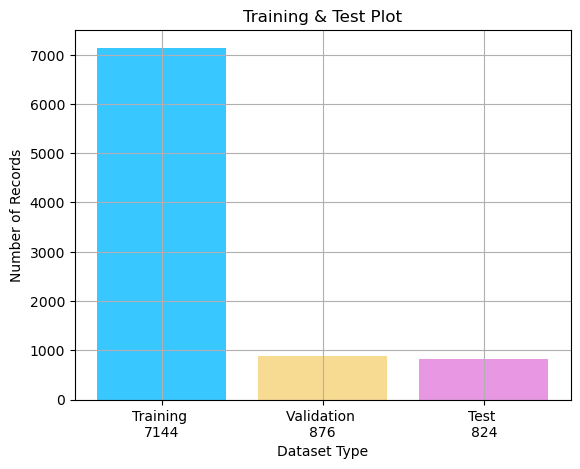

In [56]:
x_axis = ['Training \n{0}'.format(dataset_count[0]), 'Validation \n{0}'.format(dataset_count[1]), 'Test \n{0}'.format(dataset_count[2])]
y_axis = list(dataset_count)
plt.bar(x_axis, y_axis, color=['#39C7FF', '#F7DB92', '#E898E2'])
plt.title('Training & Test Plot')
plt.xlabel('Dataset Type')
plt.ylabel('Number of Records')
plt.grid()
plt.show()

In [62]:
pipeline_model = pipeline.fit(train) # training the Linear Regression
val_predictions = pipeline_model.transform(val)

In [63]:
test = test.na.drop() 
test_predictions = pipeline_model.transform(test)

In [64]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='rmse'
)

rmse = evaluator.evaluate(val_predictions)
print('RMSE: {0}'.format(rmse))

RMSE: 0.46016797247568625


In [65]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='r2'
)
r2 = evaluator.evaluate(val_predictions)
print('R-squared:', r2)

R-squared: 0.4018783022435468


### For Test

In [66]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='rmse'
)

rmse = evaluator.evaluate(test_predictions)
print('RMSE: {0}'.format(rmse))

RMSE: 0.4428010940989865


In [67]:
evaluator = RegressionEvaluator(
    labelCol = 'OBS_VALUE',
    predictionCol = 'prediction',
    metricName='r2'
)
r2 = evaluator.evaluate(test_predictions)
print('R-squared:', r2)

R-squared: 0.40032558428531706


In [68]:
lr_model = pipeline_model.stages[-1]
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [0.004423458617010262,0.02489794161013535,-7.216603150827085e-05]
Intercept: -49.74881114812119


In [69]:
val2, train2 = val, train
train2, val2 = assembler.transform(train2), assembler.transform(val2)
train_pd = train2.select('features', 'OBS_VALUE').toPandas()
val_pd = val2.select('features', 'OBS_VALUE').toPandas()

# tried with this: max_iter=20000, epsilon=0.01
svr = SVR()
svr.fit(train_pd['features'].tolist(), train_pd['OBS_VALUE'])

predictions = svr.predict(val_pd['features'].tolist())

y_true = val_pd['OBS_VALUE'].tolist()

# Calculate the RMSE
mse = mean_squared_error(y_true, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, predictions)
print("R-squared:", r2)

RMSE: 0.4779042021329973
R-squared: 0.3548830118371329


In [70]:
test2 = test
test2 = test2.na.drop() 
test2 = assembler.transform(test2)

test_pd = test2.select('features', 'OBS_VALUE').toPandas()
predictions = svr.predict(test_pd['features'].tolist())

y_true = test_pd['OBS_VALUE'].tolist()

# Calculate the RMSE
mse = mean_squared_error(y_true, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, predictions)
print("R-squared:", r2)

RMSE: 0.4568646395383803
R-squared: 0.36162886471223143
